In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
dataset_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
val_path = os.path.join(dataset_path, "val")

In [4]:
IMG_SIZE = 128  
NUM_CLASSES = 2 


def load_images_from_directory(directory, label):
    images, labels = [], []
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        category_label = 0 if category == "NORMAL" else 1
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img)
                labels.append(category_label)
    return np.array(images) / 255.0, to_categorical(labels, NUM_CLASSES)

In [5]:

# Load train, validation, and test data
X_train, y_train = load_images_from_directory(train_path, NUM_CLASSES)
X_val, y_val = load_images_from_directory(val_path, NUM_CLASSES)
X_test, y_test = load_images_from_directory(test_path, NUM_CLASSES)


In [6]:

# # Reshape for fully connected network
# X_train = X_train.reshape(len(X_train), IMG_SIZE * IMG_SIZE)
# X_val = X_val.reshape(len(X_val), IMG_SIZE * IMG_SIZE)
# X_test = X_test.reshape(len(X_test), IMG_SIZE * IMG_SIZE)


In [7]:

# Define the model
model = Sequential([
    Flatten(input_shape=(IMG_SIZE, IMG_SIZE)),  # Automatically flattens each image
    Dense(512, activation="relu", input_shape=(IMG_SIZE * IMG_SIZE,)),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(NUM_CLASSES, activation="sigmoid")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Train the model
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7575 - loss: 1.5741 - val_accuracy: 0.7500 - val_loss: 0.4216
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9135 - loss: 0.2195 - val_accuracy: 0.6875 - val_loss: 0.8309
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9371 - loss: 0.1527 - val_accuracy: 0.8750 - val_loss: 0.3264
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9250 - loss: 0.1937 - val_accuracy: 0.9375 - val_loss: 0.2131
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9377 - loss: 0.1603 - val_accuracy: 0.6250 - val_loss: 0.7287
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9345 - loss: 0.1627 - val_accuracy: 0.9375 - val_loss: 0.2737
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9562 - loss: 0.1226 - val_accuracy: 0.7500 - val_loss: 0.7551
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: 0.1247 - val_accu

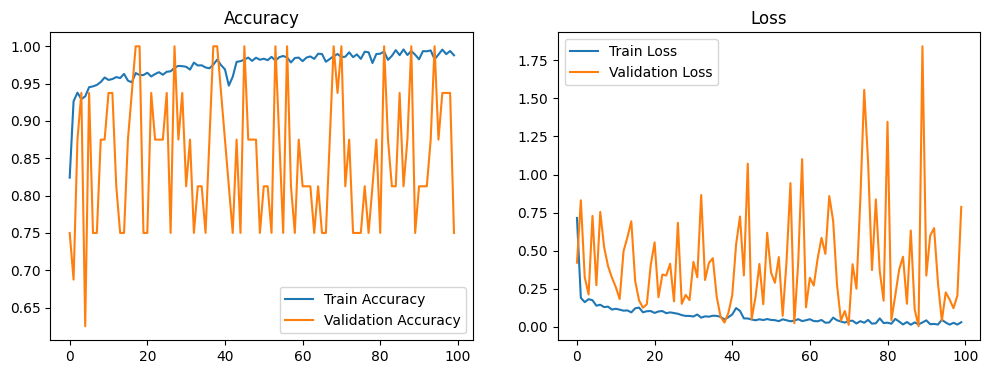

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")
plt.show()

In [13]:
# Save the model
model.save("pneumonia_ann_model.h5")


In [16]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9109 - loss: 0.8917     
Test Accuracy: 0.6971


In [18]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7500 - loss: 0.7877
Validation Accuracy: 0.7500
